# Perfiles longitudinales

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm, colors
import geopandas as gpd
import seaborn as sns
from scipy import stats

#### Cauca completo

In [2]:
cauca=pd.read_csv("G:/My Drive/INVESTIGACION/POSDOC/Data/Vector/Cauces/PerfilesTXT/Cauca_sin_Cordenadas.txt",sep='\s+',header=None)

In [3]:
dis=cauca[0].tolist()
elev=cauca[1].tolist()

In [4]:
for i in range(len(elev)-1):
    if elev[i+1]>elev[i]:
        elev[i+1]=elev[i]

In [5]:
np.max(cauca[0])-962000

283012.6224291136

In [6]:
dist=abs(cauca[0]-np.max(cauca[0]))

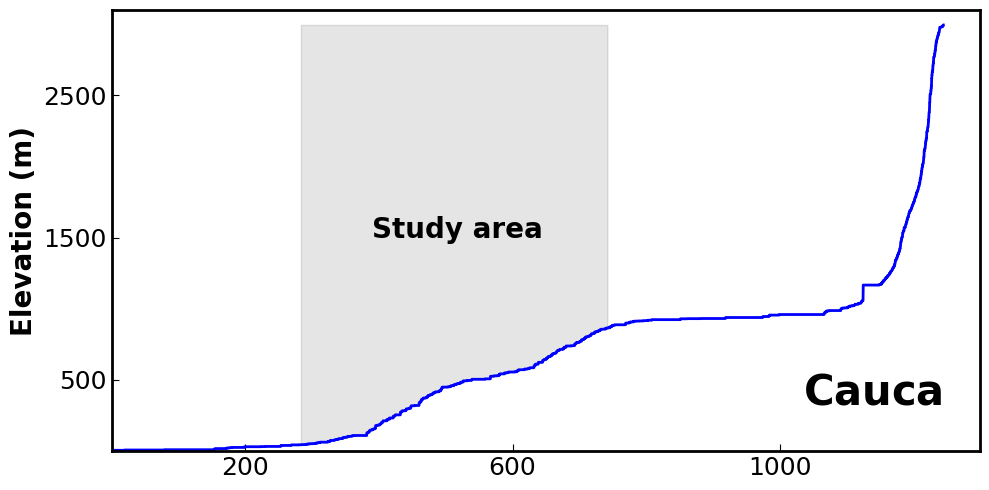

In [6]:
f,ax=plt.subplots(figsize=(10,5))
ax.plot(dist/1000,elev,'-',linewidth=2,color='blue',label=r"$\bf{Cauca}$")
x=dist/1000
plt.fill_between(x,elev,np.max(elev),where=(x>283)&(x<742),color='black',alpha=.1)
#ax.set_xlabel('Distance (km)', fontsize=18)
ax.set_ylabel('Elevation (m)', fontsize=20,fontweight='bold')
ax.legend(ncol=1, loc='lower right',prop={'size': 30},frameon=False,handlelength=0)
ax.set(xticks=ax.get_xticks()[::2], xticklabels=ax.get_xticklabels()[::2]);
ax.set(yticks=ax.get_yticks()[::2], yticklabels=ax.get_yticklabels()[::2]);
ax.set_xlim(0,1300)
ax.set_ylim(0,3100)
ax.tick_params(axis='y',direction='in',length=5,labelsize=12)
ax.tick_params(axis='x',direction='in',length=5,labelsize=12)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
plt.text(390,1500,'Study area',size=20,fontweight='bold')
ax.spines[['right', 'top','left','bottom']].set_linewidth(2)
f.tight_layout() 
#plt.savefig('G:/My Drive/INVESTIGACION/POSDOC/Figuras/cauca_profile.png',dpi=500,transparent=True);

#### Diferencias de perfiles

In [149]:
difCM=pd.read_excel("G:\My Drive\INVESTIGACION\POSDOC\Data/DiferenciasDrenajes.xlsx", sheet_name="CaucavsMagd", engine='openpyxl')
difCP=pd.read_excel("G:\My Drive\INVESTIGACION\POSDOC\Data/DiferenciasDrenajes.xlsx", sheet_name="CaucavsPorce", engine='openpyxl')
difMP=pd.read_excel("G:\My Drive\INVESTIGACION\POSDOC\Data/DiferenciasDrenajes.xlsx", sheet_name="MagdvsPorce", engine='openpyxl')
difCM.head()

x  Dif_Cotas  R.Cauca [m]  R.Magdalena [m]
0  P35  -0.773381    43.024513        43.797894
1  P34  -0.322631    45.220116        45.542747
2  P33  -3.797820    48.202180        52.000000
3  P32   7.621366    57.175026        49.553660
4  P31  17.668724    70.047260        52.378536

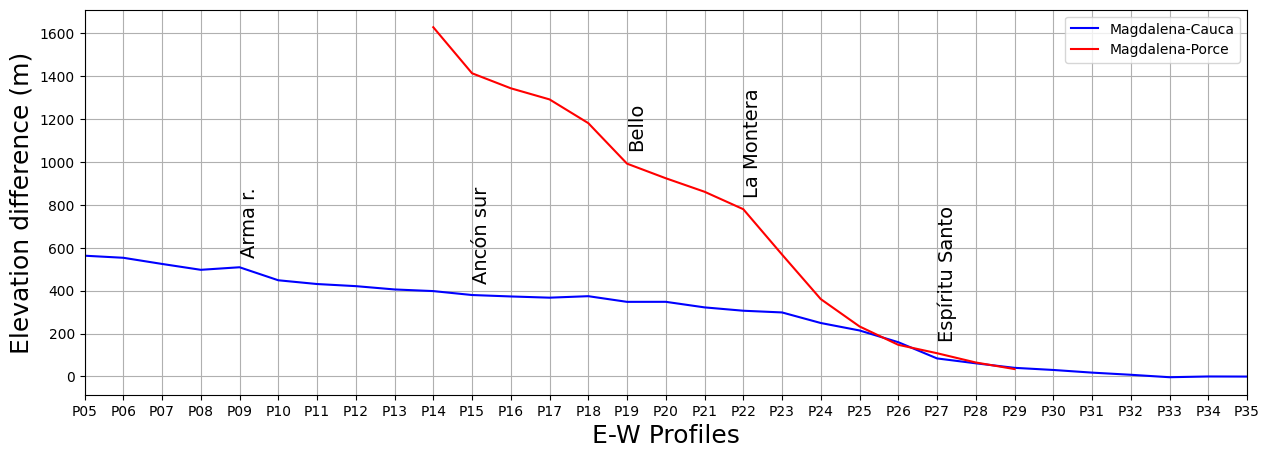

In [151]:
fig, ax = plt.subplots(figsize = (15,5))
ax.set_xlabel("E-W Profiles", fontsize=18)
ax.set_ylabel("Elevation difference (m)", fontsize=18)
plt.plot(difCM.x, difCM.Dif_Cotas, c="blue", label='Magdalena-Cauca')
#plt.plot(difCP.x, difCP.Dif_Cotas, c="green", label='Cauca-Porce')
plt.plot(difMP.x, difMP.Dif_Cotas, c="red", label='Magdalena-Porce')
plt.xlim(min(difCM.x),max(difCM.x))
ax.text("P09",570,"Arma r.",fontsize=14,rotation="vertical")
ax.text("P15",450,"Ancón sur",fontsize=14,rotation="vertical")
ax.text("P19",1070,"Bello",fontsize=14,rotation="vertical")
ax.text("P22",850,"La Montera",fontsize=14,rotation="vertical")
ax.text("P27",180,"Espíritu Santo",fontsize=14,rotation="vertical")
ax.legend()
ax.grid()
#plt.savefig('../Figuras/riverElevationDifferences.png',dpi=400,transparent=True)

### Chi coordinate

In [2]:
#to import data for chi and longitudinal profiles
data= gpd.read_file("G:/My Drive/INVESTIGACION/POSDOC/Data/Vector/AOI_30m_chi_full_adj.shp")

In [3]:
data.astype({'basin_key':'int'});

In [4]:
np.unique(data['basin_key']);

### Landslides

In [5]:
relict=gpd.read_file("G:/My Drive/INVESTIGACION/POSDOC/Data/Vector/relict_chi.gpkg")
recent_elev=gpd.read_file("G:/My Drive/INVESTIGACION/POSDOC/Data/Vector/recent2_elev.gpkg")
recent_chi=gpd.read_file("G:/My Drive/INVESTIGACION/POSDOC/Data/Vector/recent2_chi.gpkg")


### Knickpoints

In [6]:
kick=gpd.read_file("G:\My Drive\INVESTIGACION\POSDOC\Data\Vector\Knickpoints_100m_5km2/kinckpoints_chi.shp")

In [7]:
knick_cauca=kick[kick["basin_key"]==435]
knick_magda=kick[kick["basin_key"]==19]
knick_atrato=kick[kick["basin_key"]==(620 or 534)]

#### Atrato

In [ ]:
atrato=data[data["source_key"].isin([22450])]
atrato.tail(2)

In [48]:
np.arctan((atrato.loc[1980475,"elevation"]-atrato.loc[1987421,"elevation"])/(atrato.loc[1980475,"flow_dista"]-atrato.loc[1987421,"flow_dista"]))

7.67259878971184e-05

C:\Users\edier\miniconda3\Lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


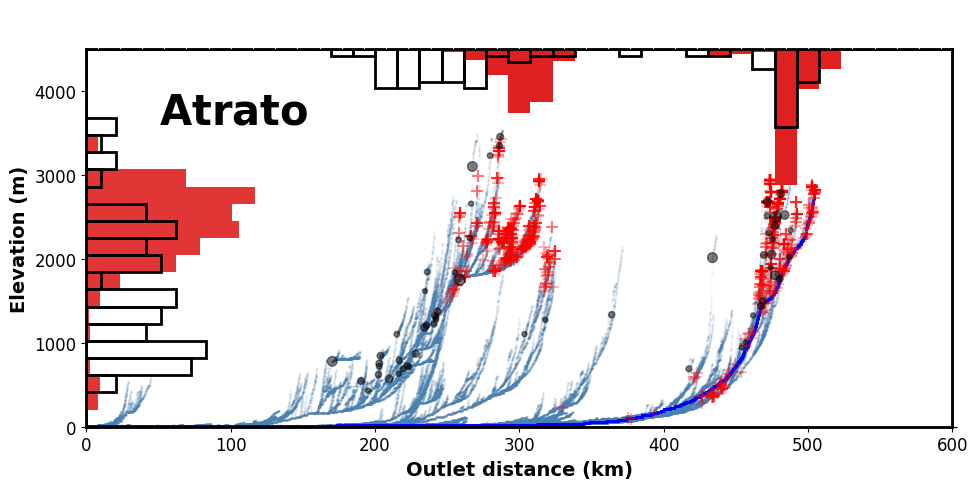

In [23]:
fig,ax=plt.subplots(figsize = (10,5))

ax3 = ax.twinx().twiny()
ax2 = ax3.twinx().twiny()

#Atrato
atrato=data[data["basin_key"]==(620 or 534)]
ax.scatter(atrato.flow_dista/1000, atrato.elevation,s=0.1,c='steelblue',alpha=0.1)

#to print selected drainage
data3=data[data["source_key"].isin([22450])]
ax.scatter(data3.flow_dista/1000,data3.elevation,s=0.5,c="blue",label=r"$\bf{Atrato}$")

#knickpoints and landslides
atrato_kick=kick[kick["basin_key"]==(620 or 534)]
atrato_recent=recent_chi[recent_chi["basin_key"]==(620 or 534)]

bind=np.arange(0,600000,15000)
atrato_kick['bins_dist'] = pd.cut(atrato_kick['flow_dista'],bins=bind,labels=bind[1:])
atrato_recent['bins_dist'] = pd.cut(atrato_recent['flow_dista'],bins=bind,labels=bind[1:])

bine=np.arange(0,4500,200)
atrato_kick['bins_elev'] = pd.cut(atrato_kick['z'],bins=bine,labels=bine[1:])
atrato_recent['bins_elev'] = pd.cut(atrato_recent['elevation'],bins=bine,labels=bine[1:])

#print landslides and knickpoints
ax.scatter(atrato_recent.flow_dista/1000,atrato_recent.elevation,s=80,marker="+",c="red",alpha=0.3)
ax.scatter(atrato_kick.flow_dista/1000,atrato_kick.elevation,s=0.5*atrato_kick.dz,marker=".",c="black",alpha=0.5)

#ax2 barras verticales hacia abajo
k=1
ax2=sns.barplot(x=bind[1:],y=k*atrato_recent.groupby('bins_dist').size()/atrato_recent.groupby('bins_dist').size().sum(),width=1,color="red",linewidth=0, edgecolor=".5",)
ax2=sns.barplot(x=bind[1:],y=k*atrato_kick.groupby('bins_dist').size()/atrato_kick.groupby('bins_dist').size().sum(),width=1,fill=False,linewidth=2, edgecolor="black",)
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel(' ', color="white") 
ax2.set_ylabel(' ', color="white")  
ax2.tick_params(axis='x', colors="white")#upper
ax2.tick_params(axis='y', colors="white")#right inverted
ax2.set_ylim(0,1)
ax2.invert_yaxis()
ax2.yaxis.set_ticks([1])
plt.gca().axes.yaxis.set_ticklabels([])

#ax3 barras horizontales
sns.barplot(y=bine[1:],x=k*atrato_recent.groupby('bins_elev').size()/atrato_recent.groupby('bins_elev').size().sum(),orient='h',ax=ax3,width=1,color="red",alpha=0.9,linewidth=0, edgecolor=".5",)
sns.barplot(y=bine[1:],x=k*atrato_kick.groupby('bins_elev').size()/atrato_kick.groupby('bins_elev').size().sum(),orient = 'h',ax=ax3,width=1,fill=False,linewidth=2, edgecolor="black",)
ax3.set_xlim(0,1)
ax3.set_yticks([])
ax3.set_xticks([])
ax3.set_xlabel(' ', color="white") 
ax3.set_ylabel(' ', color="white")  
ax3.invert_yaxis()

ax.set_xlabel('Outlet distance (km)', color="black",size=14,weight="bold") 
ax.set_ylabel('Elevation (m)', color="black",size=14,weight="bold")  
ax.tick_params(axis='x', colors="black",labelsize=12)
ax.tick_params(axis='y', colors="black",labelsize=12)
ax.yaxis.set_ticks(np.arange(0, 4500,1000))
ax.set_ylim(0,4500)
ax.set_xlim(0,600);

#ax3.legend(loc='upper left',frameon=False,fontsize=16)
ax.legend(bbox_to_anchor=(0.3,0.99),prop={'size':30},frameon=False,markerscale=0)
ax.spines[['right', 'top','left','bottom']].set_linewidth(2)

fig.tight_layout() 
plt.savefig('G:/My Drive/INVESTIGACION/POSDOC/Figuras/atrato_landslides.png',dpi=500,transparent=True)

#### Cauca

In [14]:
cauca=data[data["source_key"].isin([14126])]
cauca.tail(2)

node   row   col  latitude  longitude       chi  elevation  \
1167391  41461418  4388  8656  8.328109 -74.842572  0.000761        4.0   
1167392  41449951  4387  8655  8.328386 -74.842851  0.000000        1.0   

         flow_dista    drainage_a   m_chi   b_chi  source_key  basin_key  \
1167391      43.427  3.718300e+10  48.474  17.134       14126        435   
1167392       0.000  3.718300e+10  40.622  17.932       14126        435   

         segmented_                       geometry  
1167391      17.171  POINT (517334.327 920574.521)  
1167392      17.932  POINT (517303.606 920605.208)

In [49]:
np.arctan((cauca.loc[1152707,"elevation"]-cauca.loc[1162703,"elevation"])/(cauca.loc[1152707,"flow_dista"]-cauca.loc[1162703,"flow_dista"]))

0.0015785749822602385

In [44]:
cauca.loc[1152707,"elevation"]-cauca.loc[1162703,"elevation"]

672.1419999999999

In [45]:
cauca.loc[1152707,"flow_dista"]-cauca.loc[1162703,"flow_dista"]

425790.0

C:\Users\edier\miniconda3\Lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


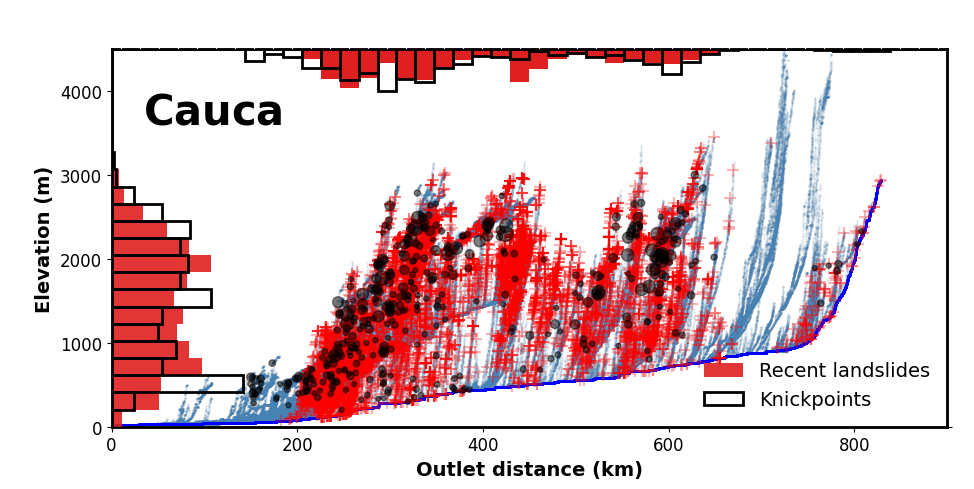

In [24]:
fig,ax=plt.subplots(figsize = (10,5))

ax3 = ax.twinx().twiny()
ax2 = ax3.twinx().twiny()

#Cauca
cauca=data[data["basin_key"].isin([435])]
ax.scatter(cauca.flow_dista/1000, cauca.elevation, s=0.1,c='steelblue',alpha=0.1)

#to print selected drainage
data1=data[data["source_key"].isin([14126])]
ax.scatter(data1.flow_dista/1000,data1.elevation,s=0.5,c="blue",label=r"$\bf{Cauca}$")

#knickpoints and landslides
cauca_kick=kick[kick["basin_key"]==435]
cauca_recent=recent_chi[recent_chi["basin_key"]==435]

bind=np.arange(0,900000,20000)
cauca_kick['bins_dist'] = pd.cut(cauca_kick['flow_dista'],bins=bind,labels=bind[1:])
cauca_recent['bins_dist'] = pd.cut(cauca_recent['flow_dista'],bins=bind,labels=bind[1:])

bine=np.arange(0,4500,200)
cauca_kick['bins_elev'] = pd.cut(cauca_kick['z'],bins=bine,labels=bine[1:])
cauca_recent['bins_elev'] = pd.cut(cauca_recent['elevation'],bins=bine,labels=bine[1:])

#print landslides and knickpoints
ax.scatter(cauca_recent.flow_dista/1000,cauca_recent.elevation,s=80,marker="+",c="red",alpha=0.3)
ax.scatter(cauca_kick.flow_dista/1000,cauca_kick.elevation,s=0.5*cauca_kick.dz,marker=".",c="black",alpha=0.5)

#ax2 barras verticales hacia abajo
k=1
ax2=sns.barplot(x=bind[1:],y=k*cauca_recent.groupby('bins_dist').size()/cauca_recent.groupby('bins_dist').size().sum(),width=1,color="red",linewidth=0, edgecolor=".5",)
ax2=sns.barplot(x=bind[1:],y=k*cauca_kick.groupby('bins_dist').size()/cauca_kick.groupby('bins_dist').size().sum(),width=1,fill=False,linewidth=2, edgecolor="black",)
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel(' ', color="white") 
ax2.set_ylabel(' ', color="white")  
ax2.tick_params(axis='x', colors="white")#upper
ax2.tick_params(axis='y', colors="white")#right inverted
ax2.set_ylim(0,1)
ax2.invert_yaxis()
ax2.yaxis.set_ticks([1])
plt.gca().axes.yaxis.set_ticklabels([])

#ax3 barras horizontales
sns.barplot(y=bine[1:],x=k*cauca_recent.groupby('bins_elev').size()/cauca_recent.groupby('bins_elev').size().sum(),label="Recent landslides",orient='h',ax=ax3,width=1,color="red",alpha=0.9,linewidth=0, edgecolor=".5",)
sns.barplot(y=bine[1:],x=k*cauca_kick.groupby('bins_elev').size()/cauca_kick.groupby('bins_elev').size().sum(),label="Knickpoints",orient = 'h',ax=ax3,width=1,fill=False,linewidth=2, edgecolor="black",)
ax3.set_xlim(0,1)
ax3.set_yticks([])
ax3.set_xticks([])
ax3.set_xlabel(' ', color="white") 
ax3.set_ylabel(' ', color="white")  
ax3.invert_yaxis()

ax.set_xlabel('Outlet distance (km)', color="black",size=14,weight="bold") 
ax.set_ylabel('Elevation (m)', color="black",size=14,weight="bold")  
ax.tick_params(axis='x', colors="black",labelsize=12)
ax.tick_params(axis='y', colors="black",labelsize=12)
ax.yaxis.set_ticks(np.arange(0,4500,1000))
ax.xaxis.set_ticks(np.arange(0,900,200))
ax.set_ylim(0,4500)
ax.set_xlim(0,900);

ax3.legend(loc='lower right',frameon=False,fontsize=14)
ax.legend(bbox_to_anchor=(0.25,0.99),prop={'size':30},frameon=False,markerscale=0)
ax.spines[['right', 'top','left','bottom']].set_linewidth(2)

fig.tight_layout() 

plt.savefig('G:/My Drive/INVESTIGACION/POSDOC/Figuras/cauca_landslides.png',dpi=500,transparent=True)

#### Magdalena

In [16]:
magda=data[data["source_key"].isin([370])]

In [52]:
np.arctan((magda.loc[19636,"elevation"]-magda.loc[39388,"elevation"])/(magda.loc[19636,"flow_dista"]-magda.loc[38388,"flow_dista"]))

0.00022478662748081732

C:\Users\edier\miniconda3\Lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


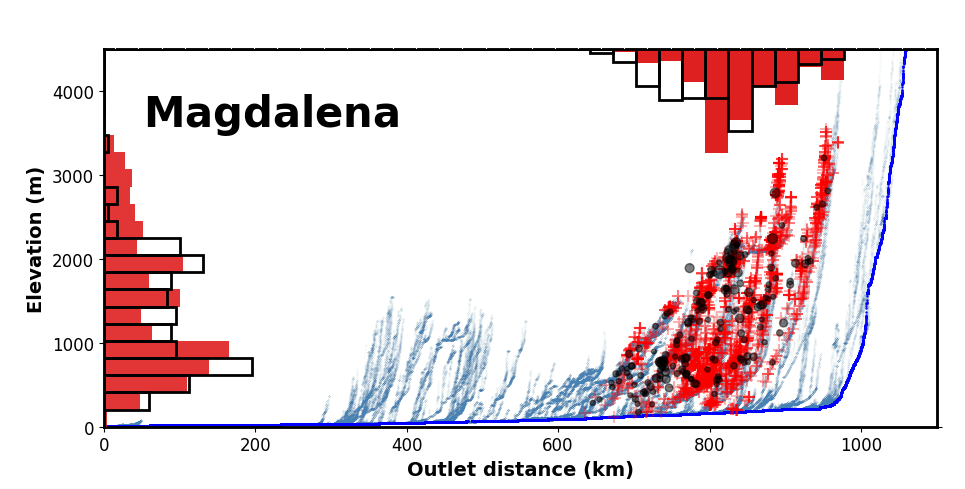

In [25]:
fig,ax=plt.subplots(figsize = (10,5))

ax3 = ax.twinx().twiny()
ax2 = ax3.twinx().twiny()

#Magda
magda=data[data["basin_key"].isin([19])]
ax.scatter(magda.flow_dista/1000, magda.elevation,s=0.01,c='steelblue',alpha=0.1)

#to print selected drainage
data2=data[data["source_key"].isin([370])]
ax.scatter(data2.flow_dista/1000,data2.elevation,s=0.5,c="blue",label=r"$\bf{Magdalena}$")

#knickpoints and landslides
magda_kick=kick[kick["basin_key"]==19]
magda_recent=recent_chi[recent_chi["basin_key"]==19]

bind=np.arange(0,1100000,30000)
magda_kick['bins_dist'] = pd.cut(magda_kick['flow_dista'],bins=bind,labels=bind[1:])
magda_recent['bins_dist'] = pd.cut(magda_recent['flow_dista'],bins=bind,labels=bind[1:])

bine=np.arange(0,4500,200)
magda_kick['bins_elev'] = pd.cut(magda_kick['z'],bins=bine,labels=bine[1:])
magda_recent['bins_elev'] = pd.cut(magda_recent['elevation'],bins=bine,labels=bine[1:])

#print landslides and knickpoints
ax.scatter(magda_recent.flow_dista/1000,magda_recent.elevation,s=80,marker="+",c="red",alpha=0.3)
ax.scatter(magda_kick.flow_dista/1000,magda_kick.elevation,s=0.5*magda_kick.dz,marker=".",c="black",alpha=0.5)

#ax2 barras verticales hacia abajo
k=1
ax2=sns.barplot(x=bind[1:],y=k*magda_recent.groupby('bins_dist').size()/magda_recent.groupby('bins_dist').size().sum(),width=1,color="red",linewidth=0, edgecolor=".5",)
ax2=sns.barplot(x=bind[1:],y=k*magda_kick.groupby('bins_dist').size()/magda_kick.groupby('bins_dist').size().sum(),width=1,fill=False,linewidth=2, edgecolor="black",)
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel(' ', color="white") 
ax2.set_ylabel(' ', color="white")  
ax2.tick_params(axis='x', colors="white")#upper
ax2.tick_params(axis='y', colors="white")#right inverted
ax2.set_ylim(0,1)
ax2.invert_yaxis()
ax2.yaxis.set_ticks([1])
plt.gca().axes.yaxis.set_ticklabels([])

#ax3 barras horizontales
sns.barplot(y=bine[1:],x=k*magda_recent.groupby('bins_elev').size()/magda_recent.groupby('bins_elev').size().sum(),orient='h',ax=ax3,width=1,color="red",alpha=0.9,linewidth=0, edgecolor=".5",)
sns.barplot(y=bine[1:],x=k*magda_kick.groupby('bins_elev').size()/magda_kick.groupby('bins_elev').size().sum(),orient = 'h',ax=ax3,width=1,fill=False,linewidth=2, edgecolor="black",)
ax3.set_xlim(0,1)
ax3.set_yticks([])
ax3.set_xticks([])
ax3.set_xlabel(' ', color="white") 
ax3.set_ylabel(' ', color="white")  
ax3.invert_yaxis()

ax.set_xlabel('Outlet distance (km)', color="black",size=14,weight="bold") 
ax.set_ylabel('Elevation (m)', color="black",size=14,weight="bold")  
ax.tick_params(axis='x', colors="black",labelsize=12)
ax.tick_params(axis='y', colors="black",labelsize=12)
ax.yaxis.set_ticks(np.arange(0,4500,1000))
ax.xaxis.set_ticks(np.arange(0,1100,200))
ax.set_ylim(0,4500)
ax.set_xlim(0,1100);

#ax3.legend(loc='upper left',frameon=False,fontsize=16)
ax.legend(bbox_to_anchor=(0.4,0.99),prop={'size':30},frameon=False,markerscale=0)
ax.spines[['right', 'top','left','bottom']].set_linewidth(2)
fig.tight_layout() 

plt.savefig('G:/My Drive/INVESTIGACION/POSDOC/Figuras/magdalena_landslides.png',dpi=500,transparent=True)

#### Atrato-Cauca-Magdalena

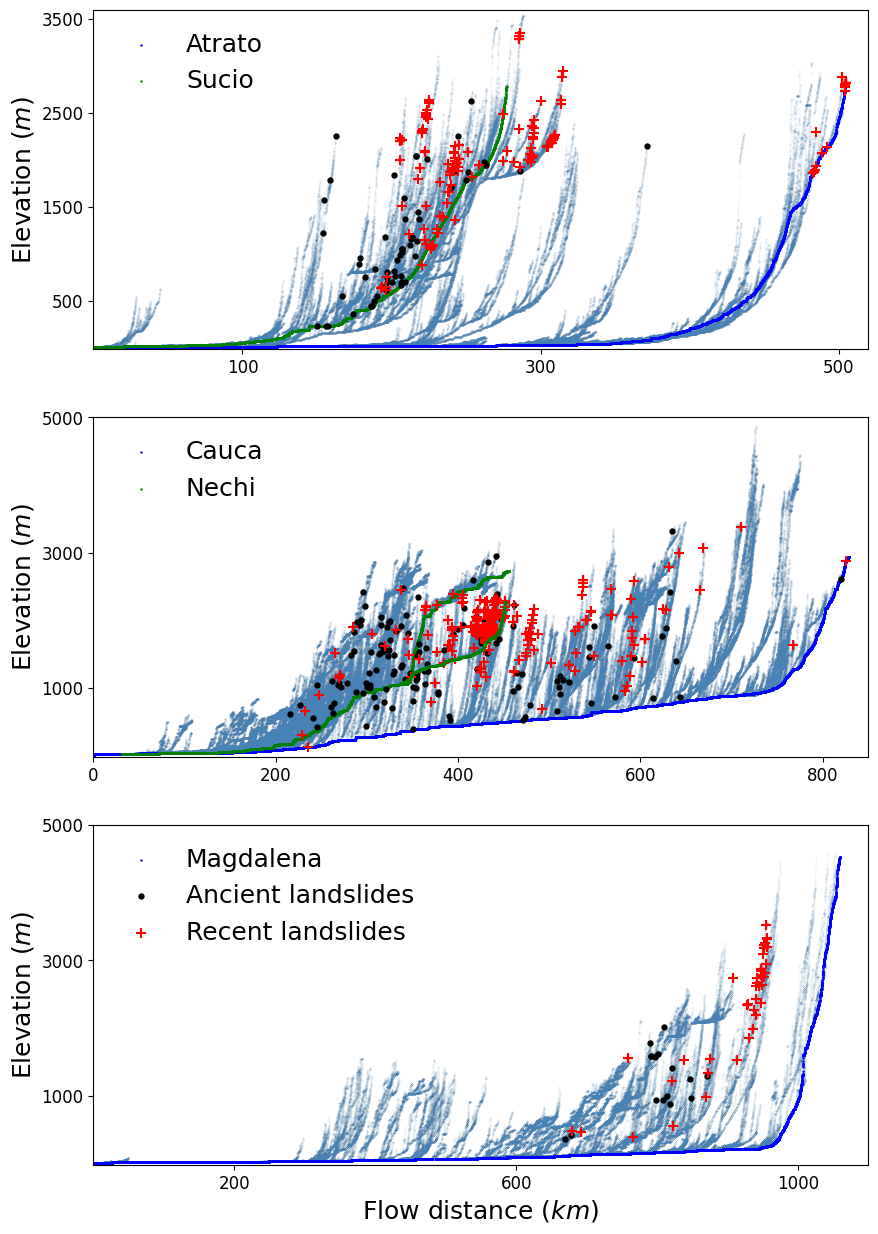

In [78]:
fig, ax = plt.subplots(3,1,figsize = (10,15))
#Atrato
sucio=data[data["basin_key"].isin([620])]
ax[0].scatter(sucio.flow_dista/1000, sucio.elevation,s=0.1,c='steelblue',alpha=0.1)
atrato=data[data["basin_key"].isin([534])]
ax[0].scatter(atrato.flow_dista/1000, atrato.elevation,s=0.1,c='steelblue',alpha=0.1)
data3=data[data["source_key"].isin([22450])]
ax[0].scatter(data3.flow_dista/1000,data3.elevation,s=0.5,c="blue",label="Atrato")
#data3=data[data["source_key"].isin([23193])]
#ax[0].scatter(data3.flow_dista/1000,data3.elevation,s=0.5,c="blue")
#data3=data[data["source_key"].isin([21133])]
#ax[0].scatter(data3.flow_dista/1000,data3.elevation,s=0.5,c="green",label="Sucio")
relict_a=relict[~relict["basin_key"].isin([435])]
relict_a=relict_a[~relict_a["basin_key"].isin([19])]
ax[0].scatter(relict_a.flow_dista/1000,relict_a.elevation,s=50,marker=".",c="black")
recent_a=recent[~recent["basin_key"].isin([435])]
recent_a=recent_a[~recent_a["basin_key"].isin([19])]
ax[0].scatter(recent_a.flow_dista/1000,recent_a.elevation,s=50,marker="+",c="red")

#ax.set_xlabel('Flow distance (km)', fontsize=18)
ax[0].set_ylabel('Elevation (m)', fontsize=22)
ax[0].legend(ncol=1, loc='upper left',prop={'size':26},frameon=False,handlelength=0)
ax[0].set(xticks=ax[0].get_xticks()[::2], xticklabels=ax[0].get_xticklabels()[::2]);
ax[0].set(yticks=ax[0].get_yticks()[::2], yticklabels=ax[0].get_yticklabels()[::2]);
ax[0].set_xlim(0,520)
ax[0].set_ylim(-20,3600)
ax[0].tick_params(axis='y', labelsize=14)
ax[0].tick_params(axis='x', labelsize=14)

#Cauca
cauca=data[data["basin_key"].isin([435])]
ax[1].scatter(cauca.flow_dista/1000, cauca.elevation, s=0.1,c='steelblue',alpha=0.1)
data1=data[data["source_key"].isin([14126])]
ax[1].scatter(data1.flow_dista/1000,data1.elevation,s=0.5,c="blue",label="Cauca")
#data2=data[data["source_key"].isin([15971])]
#ax[1].scatter(data2.flow_dista/1000,data2.elevation,s=0.5,c="green")
relict_c=relict[relict["basin_key"].isin([435])]
ax[1].scatter(relict_c.flow_dista/1000,relict_c.elevation,s=50,marker=".",c="black")
recent_c=recent[recent["basin_key"].isin([435])]
ax[1].scatter(recent_c.flow_dista/1000,recent_c.elevation,s=50,marker="+",c="red")

#data3=data[data["source_key"].isin([15985])]
#ax[1].scatter(data3.flow_dista/1000,data3.elevation,s=0.5,c="green",label="Nechi")

#ax.set_xlabel('Flow distance (km)', fontsize=18)
ax[1].set_ylabel('Elevation (m)', fontsize=22)
ax[1].legend(ncol=1, loc='upper left',prop={'size': 26},frameon=False,handlelength=0)
ax[1].set_xlim(0,850)
ax[1].set(xticks=ax[1].get_xticks()[::2], xticklabels=ax[1].get_xticklabels()[::2]);
ax[1].set(yticks=ax[1].get_yticks()[::2], yticklabels=ax[1].get_yticklabels()[::2]);
ax[1].set_ylim(-20,5000)
ax[1].tick_params(axis='y', labelsize=14)
ax[1].tick_params(axis='x', labelsize=14)

#Magda
magda=data[data["basin_key"].isin([19])]
ax[2].scatter(magda.flow_dista/1000, magda.elevation,s=0.01,c='steelblue',alpha=0.1)
data2=data[data["source_key"].isin([370])]
ax[2].scatter(data2.flow_dista/1000,data2.elevation,s=0.5,c="blue",label="Magdalena")
relict_c=relict[relict["basin_key"].isin([19])]
ax[2].scatter(relict_c.flow_dista/1000,relict_c.elevation,s=50,marker=".",c="black")
recent_c=recent[recent["basin_key"].isin([19])]
ax[2].scatter(recent_c.flow_dista/1000,recent_c.elevation,s=50,marker="+",c="red")

ax[2].set_xlabel('Distance (km)', fontsize=22)
ax[2].set_ylabel('Elevation (m)', fontsize=22)
ax[2].legend(ncol=1, loc='upper left',prop={'size': 26},frameon=False,handlelength=0)
ax[2].set(xticks=ax[2].get_xticks()[::2], xticklabels=ax[2].get_xticklabels()[::2]);
ax[2].set(yticks=ax[2].get_yticks()[::2], yticklabels=ax[2].get_yticklabels()[::2]);
ax[2].set_xlim(0,1100)
ax[2].set_ylim(-20,5000)
ax[2].tick_params(axis='y', labelsize=14)
ax[2].tick_params(axis='x', labelsize=14)

plt.savefig('G:/My Drive/INVESTIGACION/POSDOC/Figuras/basin_landslides.png',dpi=500,transparent=True)

#### Atrato-Cauca-Magdalena sin MenM

Se importan los valores de elevacion y distancia de los MenM. La elevacion se obtuvo a partir del DEM sacando el valor del punto donde esta ubicado el MenM, y la distancia se obtuvo a partir del punto vecino mas cercano en el AOI_60m_full_chi.

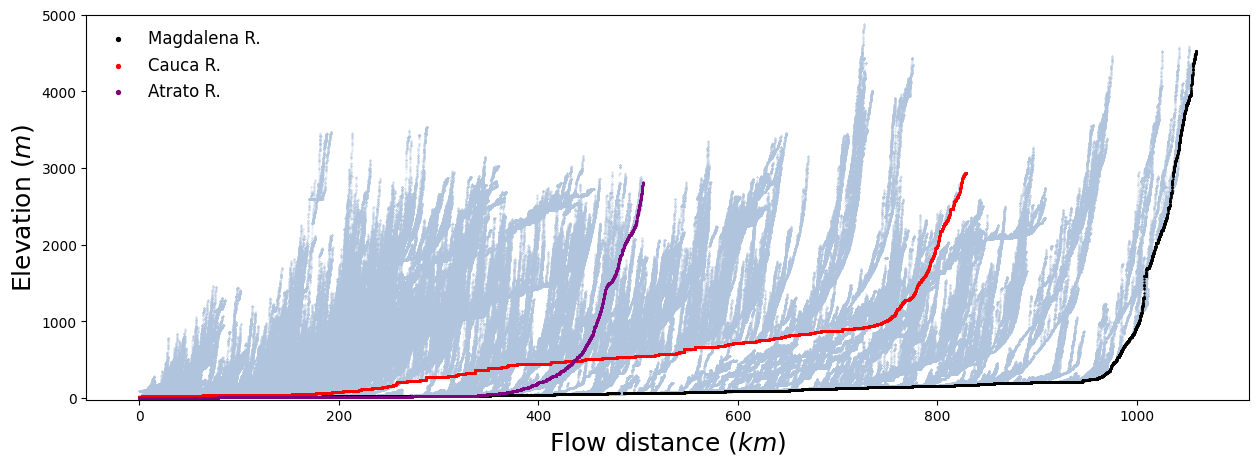

In [4]:
fig, ax = plt.subplots(figsize = (15,5))
#to print the entire number of drainage
ax.scatter(data.flow_dista/1000, data.elevation,s=0.05,c='lightsteelblue',alpha=0.8,)

#to print selected drainage
data2=data[data["source_key"].isin([370])]
ax.scatter(data2.flow_dista/1000,data2.elevation,s=0.5,c="black",label="Magdalena R.")
data1=data[data["source_key"].isin([14126])]
ax.scatter(data1.flow_dista/1000,data1.elevation,s=0.5,c="red",label="Cauca R.")
data3=data[data["source_key"].isin([22450])]
ax.scatter(data3.flow_dista/1000,data3.elevation,s=0.5,c="purple",label="Atrato R.")

ax.set_xlabel('Flow distance ($km$)', fontsize=18)
ax.set_ylabel('Elevation ($m$)', fontsize=18)
ax.legend(ncol=1, loc='upper left',prop={'size': 12},markerscale=4,frameon=False)
#ax.set_xlim(0,1100)
ax.set_ylim(-20,5000);
#plt.savefig('G:/My Drive/INVESTIGACION/POSDOC/Figuras/LongProfi_All_30m.png',dpi=400,transparent=True)

#### Atrato-Cauca-Magdalena con MenM

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


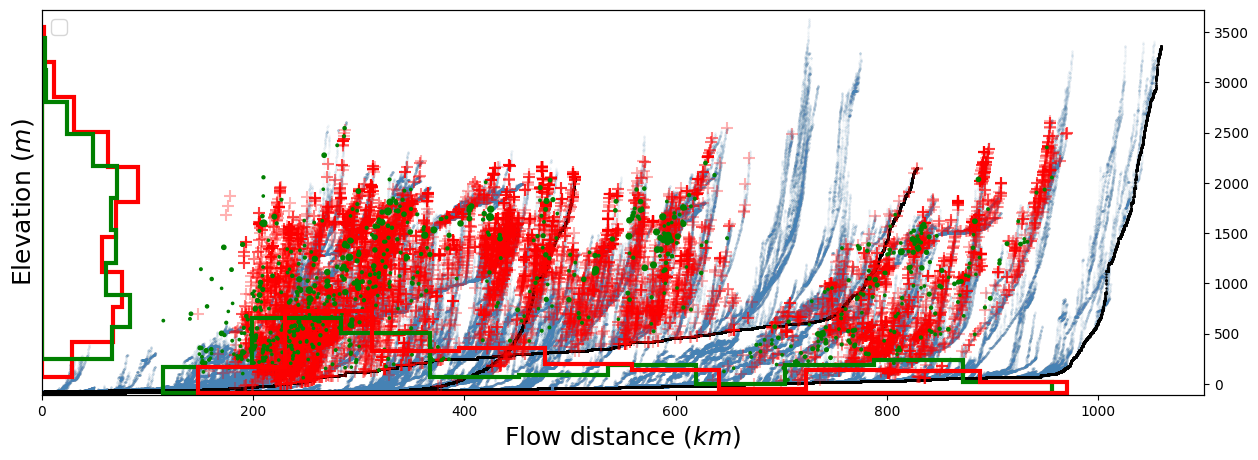

In [179]:
fig, ax = plt.subplots(figsize = (15,5))

#Cauca
cauca=data[data["basin_key"].isin([435])]
ax.scatter(cauca.flow_dista/1000, cauca.elevation, s=0.05,c='steelblue',alpha=0.1)
#Magda
magda=data[data["basin_key"].isin([19])]
ax.scatter(magda.flow_dista/1000, magda.elevation,s=0.05,c='steelblue',alpha=0.1)
#Atrato
atrato=data[data["basin_key"].isin([620])]
ax.scatter(atrato.flow_dista/1000, atrato.elevation,s=0.05,c='steelblue',alpha=0.1)

#to print selected drainage
data2=data[data["source_key"].isin([370])]
ax.scatter(data2.flow_dista/1000,data2.elevation,s=0.5,c="black") #label="Magdalena R."
data1=data[data["source_key"].isin([14126])]
ax.scatter(data1.flow_dista/1000,data1.elevation,s=0.5,c="black") #label="Cauca R."
data3=data[data["source_key"].isin([22450])]
ax.scatter(data3.flow_dista/1000,data3.elevation,s=0.5,c="black") #label="Atrato R."

ax.scatter(recent_chi.flow_dista/1000,recent_chi.elevation,s=80,marker="+",c="red",alpha=0.3)
ax.scatter(kick.flow_dista/1000,kick.elevation,s=0.1*kick.dz,marker=".",c="green")

H=500
V=4000
ax.hist(kick["flow_dista"]/1000,histtype='stepfilled',fill=False,linewidth=3,edgecolor="green",weights=V*np.full(len(kick["flow_dista"]), 1/len(kick["flow_dista"])))
ax.hist(recent_chi.flow_dista/1000,fill=False,linewidth=3,edgecolor="red",histtype='stepfilled',alpha=1,weights=V*np.full(len(recent_chi.flow_dista), 1/len(recent_chi.flow_dista/1000)))
ax.set_ylim(0,1000)
ax.set_yticks([])

ax1 = ax.twinx()
ax1.hist(recent_chi["elevation"],orientation='horizontal',fill=False,linewidth=3,edgecolor="red",histtype='stepfilled',alpha=1,label="Percentage recent landslides",weights=H*np.full(len(recent_chi["elevation"]), 1/len(recent_chi["elevation"])))
ax1.hist(kick["z"],orientation='horizontal',histtype='stepfilled',fill=False,linewidth=3,edgecolor="green",label="Percentage knickpoints",weights=H*np.full(len(kick["z"]), 1/len(kick["z"])))

ax.set_xlabel('Flow distance ($km$)', fontsize=18)
ax.set_ylabel('Elevation ($m$)', fontsize=18)
ax.legend(ncol=1, loc='upper left',prop={'size': 14})
ax.set_xlim(0,1100)
ax.set_ylim(-20,5000);
#plt.savefig('G:/My Drive/INVESTIGACION/POSDOC/Figuras/recent_relict_profiles_B.png',dpi=500,transparent=True)

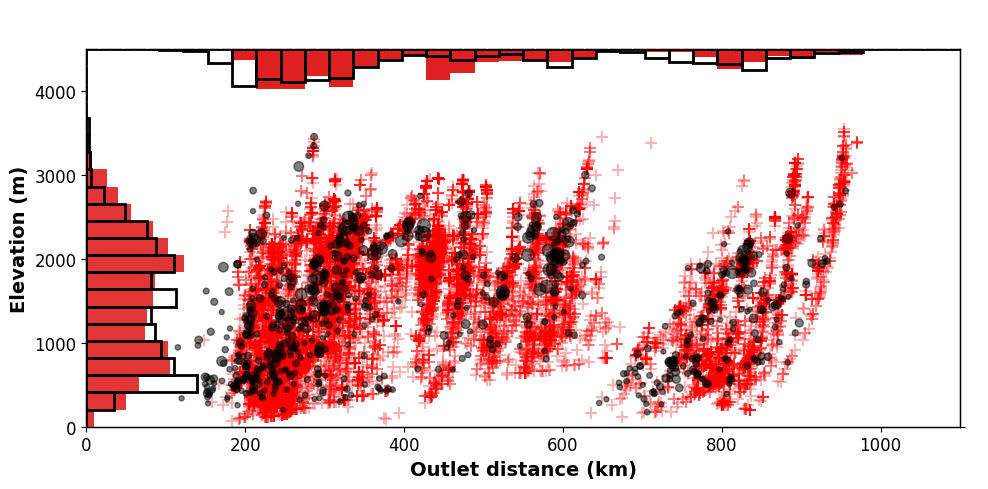

In [16]:
fig,ax=plt.subplots(figsize = (10,5))

bind=np.arange(0,1100000,30000)
kick['bins_dist'] = pd.cut(kick['flow_dista'],bins=bind,labels=bind[1:])
recent_chi['bins_dist'] = pd.cut(recent_chi['flow_dista'],bins=bind,labels=bind[1:])

bine=np.arange(0,4500,200)
kick['bins_elev'] = pd.cut(kick['z'],bins=bine,labels=bine[1:])
recent_chi['bins_elev'] = pd.cut(recent_chi['elevation'],bins=bine,labels=bine[1:])

ax3 = ax.twinx().twiny()
ax2 = ax3.twinx().twiny()

#Cauca
cauca=data[data["basin_key"].isin([435])]
ax.scatter(cauca.flow_dista/1000, cauca.elevation, s=0.05,c='steelblue',alpha=0.001)
#Magda
magda=data[data["basin_key"].isin([19])]
ax.scatter(magda.flow_dista/1000, magda.elevation,s=0.05,c='steelblue',alpha=0.001)
#Atrato
atrato=data[data["basin_key"].isin([620])]
ax.scatter(atrato.flow_dista/1000, atrato.elevation,s=0.05,c='steelblue',alpha=0.001)
atrato=data[data["basin_key"].isin([534])]
ax.scatter(atrato.flow_dista/1000, atrato.elevation,s=0.1,c='steelblue',alpha=0.001)


#print landslides and knickpoints
ax.scatter(recent_chi.flow_dista/1000,recent_chi.elevation,s=80,marker="+",c="red",alpha=0.3)
ax.scatter(kick.flow_dista/1000,kick.elevation,s=0.5*kick.dz,marker=".",c="black",alpha=0.5)

#ax2 barras verticales hacia abajo
k=1
ax2=sns.barplot(x=bind[1:],y=k*recent_chi.groupby('bins_dist').size()/recent_chi.groupby('bins_dist').size().sum(),width=1,color="red",linewidth=0, edgecolor=".5",)
ax2=sns.barplot(x=bind[1:],y=k*kick.groupby('bins_dist').size()/kick.groupby('bins_dist').size().sum(),width=1,fill=False,linewidth=2, edgecolor="black",)
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel(' ', color="white") 
ax2.set_ylabel(' ', color="white")  
ax2.tick_params(axis='x', colors="white")#upper
ax2.tick_params(axis='y', colors="white")#right inverted
ax2.set_ylim(0,1)
ax2.invert_yaxis()
ax2.yaxis.set_ticks([1])
plt.gca().axes.yaxis.set_ticklabels([])

#ax3 barras horizontales
sns.barplot(y=bine[1:],x=k*recent_chi.groupby('bins_elev').size()/recent_chi.groupby('bins_elev').size().sum(),orient='h',ax=ax3,width=1,color="red",alpha=0.9,linewidth=0, edgecolor=".5",)
sns.barplot(y=bine[1:],x=k*kick.groupby('bins_elev').size()/kick.groupby('bins_elev').size().sum(),orient='h',ax=ax3,width=1,fill=False,linewidth=2, edgecolor="black",)
ax3.set_xlim(0,1)
ax3.set_yticks([])
ax3.set_xticks([])
ax3.set_xlabel(' ', color="white") 
ax3.set_ylabel(' ', color="white")  
ax3.invert_yaxis()

ax.set_xlabel('Outlet distance (km)', color="black",size=14,weight="bold") 
ax.set_ylabel('Elevation (m)', color="black",size=14,weight="bold")  
ax.tick_params(axis='x', colors="black",labelsize=12)
ax.tick_params(axis='y', colors="black",labelsize=12)
ax.yaxis.set_ticks(np.arange(0, 4500,1000))
ax.set_ylim(0,4500)
ax.set_xlim(0,1100);

fig.tight_layout() 
plt.savefig('G:/My Drive/INVESTIGACION/POSDOC/Figuras/knickpoint_recent_full.png',dpi=500)

In [45]:
print(stats.ks_2samp(kick['flow_dista'], recent_chi['flow_dista']))

KstestResult(statistic=0.11658079712323458, pvalue=9.316523457358418e-09, statistic_location=216900.0, statistic_sign=1)


In [46]:
print(stats.ks_2samp(kick['z'], recent_chi['elevation']))

KstestResult(statistic=0.08569302337622431, pvalue=6.29611264396788e-05, statistic_location=1688.0, statistic_sign=1)


In [41]:
# Perform the Kolmogorov-Smirnov Test: If p-value is lower than 0.05, then it is very probable that the two distributions are different.
print(stats.ks_2samp(kick['bins_dist'], recent_chi['bins_dist']))

KstestResult(statistic=0.11192008307612139, pvalue=4.194292185477631e-08, statistic_location=210000, statistic_sign=1)


In [42]:
print(stats.ks_2samp(kick['bins_elev'], recent_chi['bins_elev']))

KstestResult(statistic=0.08059137454737375, pvalue=0.00020821878879678207, statistic_location=1600, statistic_sign=1)


In [47]:
t_stat, p_value = stats.ttest_ind(kick['flow_dista'], recent_chi['flow_dista'])
print(t_stat,p_value)

-0.24619747781497853 0.8055330651675026


In [48]:
t_stat, p_value = stats.ttest_ind(kick['z'], recent_chi['elevation'])
print(t_stat,p_value)

-4.047945444098428 5.1953859749395214e-05


In [43]:
# Perform the t-test: id p_value is less than 0.05 we reject the null hypothesis and conclude that there is a significant difference between the sample means
t_stat, p_value = stats.ttest_ind(kick['bins_dist'], recent_chi['bins_dist'])
print(t_stat,p_value)

-0.26119576598494143 0.7939454787253731


In [44]:
t_stat, p_value = stats.ttest_ind(kick['bins_elev'], recent_chi['bins_elev'])
print(t_stat,p_value)

-4.137123693532148 3.537915782831033e-05


(-20.0, 5000.0)

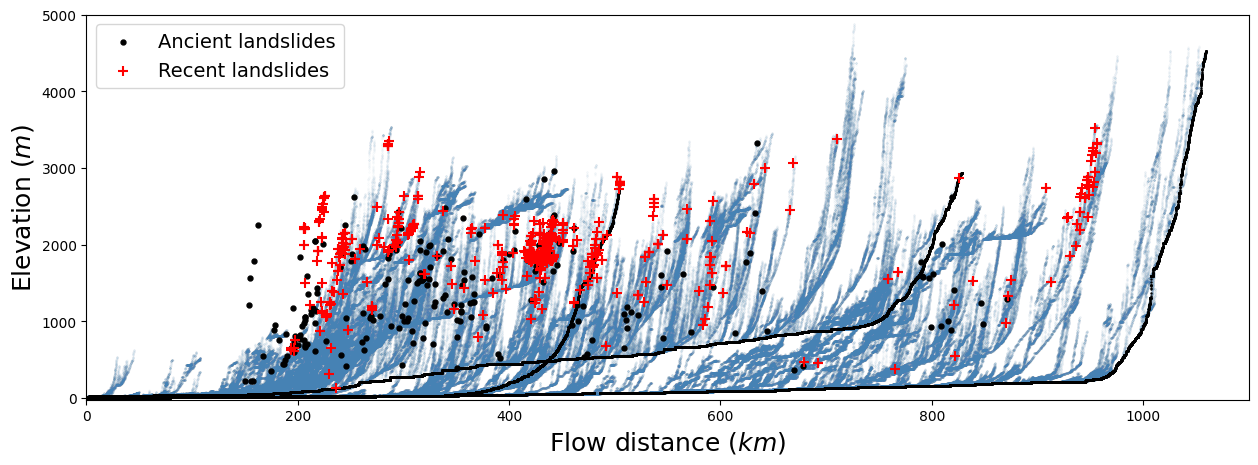

In [60]:
fig, ax = plt.subplots(figsize = (15,5))
#Cauca
cauca=data[data["basin_key"].isin([435])]
ax.scatter(cauca.flow_dista/1000, cauca.elevation, s=0.05,c='steelblue',alpha=0.1)
#Magda
magda=data[data["basin_key"].isin([19])]
ax.scatter(magda.flow_dista/1000, magda.elevation,s=0.05,c='steelblue',alpha=0.1)
#Atrato
atrato=data[data["basin_key"].isin([620])]
ax.scatter(atrato.flow_dista/1000, atrato.elevation,s=0.05,c='steelblue',alpha=0.1)

#to print selected drainage
data2=data[data["source_key"].isin([370])]
ax.scatter(data2.flow_dista/1000,data2.elevation,s=0.5,c="black") #label="Magdalena R."
data1=data[data["source_key"].isin([14126])]
ax.scatter(data1.flow_dista/1000,data1.elevation,s=0.5,c="black") #label="Cauca R."
data3=data[data["source_key"].isin([22450])]
ax.scatter(data3.flow_dista/1000,data3.elevation,s=0.5,c="black") #label="Atrato R."

ax.scatter(relict.flow_dista/1000,relict.elevation,s=50,marker=".",c="black",label="Ancient landslides")
ax.scatter(recent.flow_dista/1000,recent.elevation,s=50,marker="+",c="red",label="Recent landslides")
ax.set_xlabel('Flow distance ($km$)', fontsize=18)
ax.set_ylabel('Elevation ($m$)', fontsize=18)
ax.legend(ncol=1, loc='upper left',prop={'size': 14})
ax.set_xlim(0,1100)
ax.set_ylim(-20,5000)

#### Perfiles en $\chi$ Atrato-Cauca-Magdalena con MenM

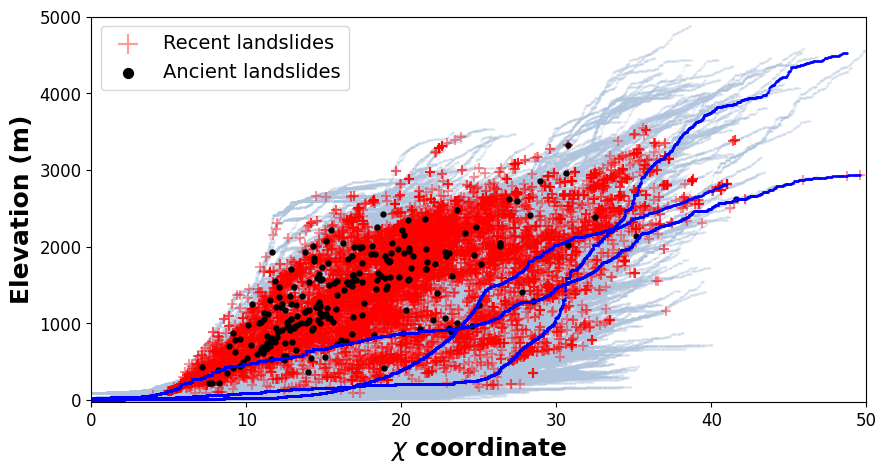

In [404]:
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(data.chi, data.elevation,s=0.05,c='lightsteelblue',alpha=0.8)

ax.scatter(recent_chi.chi,recent_chi.elevation,s=50,marker="+",c="red",alpha=0.4,label="Recent landslides")
ax.scatter(relict.chi,relict.elevation,s=50,marker=".",c="black",label="Ancient landslides")

#to print selected drainage
data2=data[data["source_key"].isin([370])]
ax.scatter(data2.chi,data2.elevation,s=0.5,c="b")
data1=data[data["source_key"].isin([14126])]
ax.scatter(data1.chi,data1.elevation,s=0.5,c="b")
data3=data[data["source_key"].isin([22450])]
ax.scatter(data3.chi,data3.elevation,s=0.5,c="b")

ax.set_xlabel('$\chi$ coordinate', fontsize=18,weight="bold")
ax.set_ylabel('Elevation (m)', fontsize=18,weight="bold")
ax.tick_params(axis='x', colors="black",labelsize=12)
ax.tick_params(axis='y', colors="black",labelsize=12)
ax.set_xlim(0,50)
ax.set_ylim(-20,5000)
ax.legend(ncol=1, loc='upper left',prop={'size': 14},markerscale=2)
plt.savefig('G:/My Drive/INVESTIGACION/POSDOC/Figuras/chi-elevation_All_30m.png',dpi=500,transparent=True)

In [31]:
fig, ax = plt.subplots(figsize = (15,5))
ax.scatter(data.chi, data.elevation,s=0.05,c='lightsteelblue',alpha=0.8)

#to print selected drainage
data2=data[data["source_key"].isin([370])]
ax.scatter(data2.chi,data2.elevation,s=0.5,c="black",label="Magdalena R.")
data1=data[data["source_key"].isin([14126])]
ax.scatter(data1.chi,data1.elevation,s=0.5,c="red",label="Cauca R.")
data3=data[data["source_key"].isin([22450])]
ax.scatter(data3.chi,data3.elevation,s=0.5,c="purple",label="Atrato R.")

ax.set_xlabel('$\chi$ distance', fontsize=18)
ax.set_ylabel('Elevation (m)', fontsize=18)
ax.set_xlim(0,50)
ax.set_ylim(-20,5000)
ax.legend(ncol=1, loc='upper left',prop={'size': 14},markerscale=4)
plt.savefig('G:/My Drive/INVESTIGACION/POSDOC/Figuras/landslides_chi-elevation_All_30m.png',dpi=400,transparent=True)

fid  AOI_60m_fu                       geometry
0  1.0       765.0  POINT (404187.110 752665.590)
1  2.0      1606.0  POINT (443782.345 703321.444)
2  3.0      1493.0  POINT (411214.965 741208.592)
3  4.0      2015.0  POINT (397878.994 758139.395)
4  5.0      1554.0  POINT (400192.726 757568.355)

### rio Cauca

(-20.0, 5000.0)

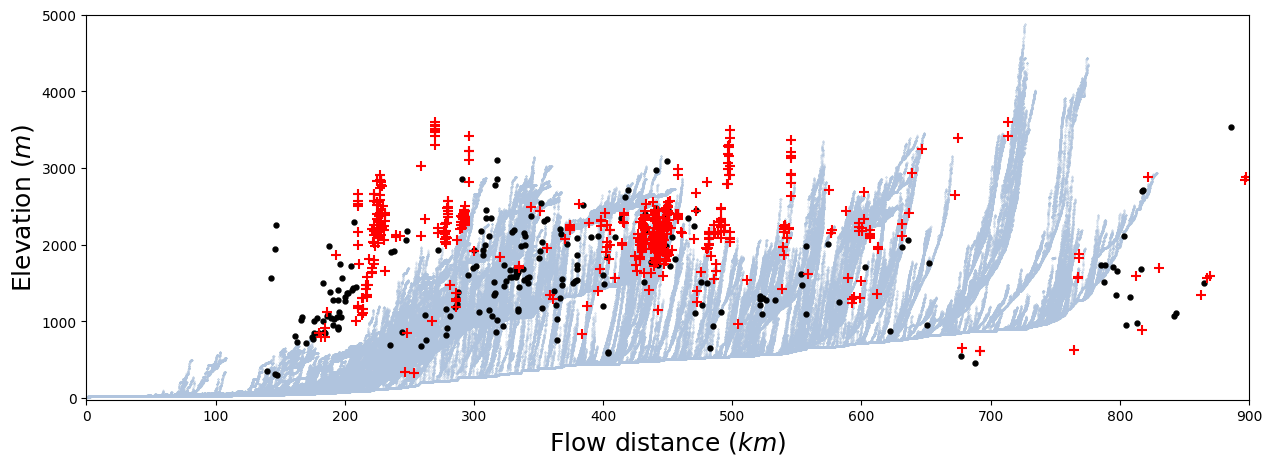

In [30]:
#To select basin (when there are several)
cauca=data[data["basin_key"].isin([435])]

fig, ax = plt.subplots(figsize = (15,5))
#to print the entire number of drainage
ax.scatter(cauca.flow_dista/1000,cauca.elevation,s=0.05,c='lightsteelblue',alpha=0.8)

#landslides
ax.scatter(relictD.TargetID/1000,relictE.AOI_60m_fu,s=50,marker=".",c="black",label="Relict landslides")
ax.scatter(recentD.TargetID/1000,recentE.AOI_60m_fu,s=50,marker="+",c="red",label="Recent landslides")

ax.set_xlabel('Flow distance ($km$)', fontsize=18)
ax.set_ylabel('Elevation ($m$)', fontsize=18)
ax.set_xlim(0,900)
ax.set_ylim(-20,5000)
#plt.savefig('G:/My Drive/INVESTIGACION/POSDOC/Figuras/LongProfi_cauca_30m.png',dpi=400,transparent=True)

(-20.0, 5000.0)

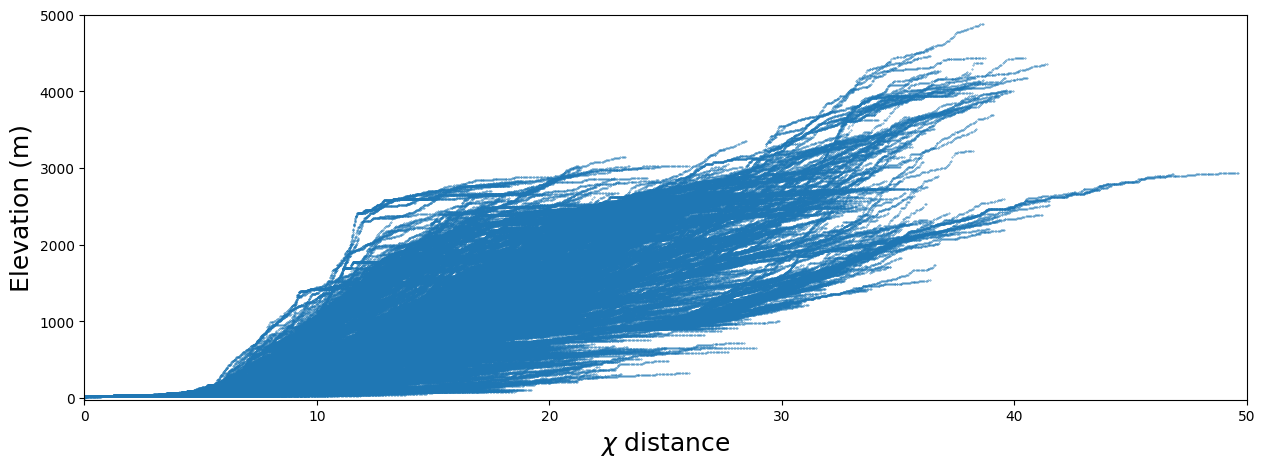

In [47]:
fig, ax = plt.subplots(figsize = (15,5))
ax.scatter(cauca.chi, cauca.elevation, s=0.1)

ax.set_xlabel('$\chi$ distance', fontsize=18)
ax.set_ylabel('Elevation (m)', fontsize=18)
ax.set_xlim(0,50)
ax.set_ylim(-20,5000)
#plt.savefig('/content/drive/MyDrive/INVESTIGACION/POSDOC/Figuras/chi-elevation_cauca_30m.png',dpi=400,transparent=True)

### rio Magdalena

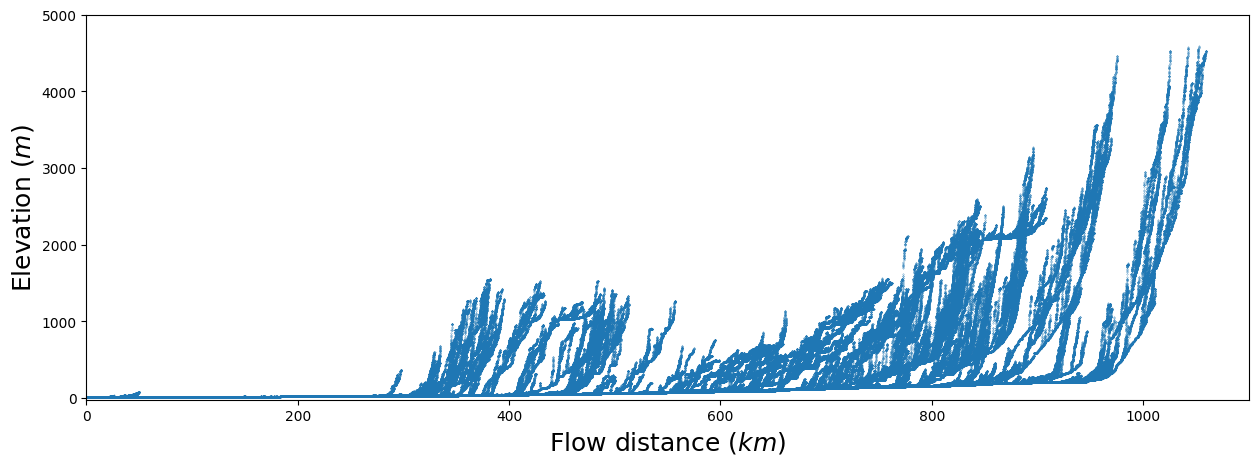

In [26]:
#To select basin (when there are several)
magda=data[data["basin_key"].isin([19])]

fig, ax = plt.subplots(figsize = (15,5))
#to print the entire number of drainage
ax.scatter(magda.flow_dista/1000, magda.elevation, s=0.05)

ax.set_xlabel('Flow distance ($km$)', fontsize=18)
ax.set_ylabel('Elevation ($m$)', fontsize=18)
ax.set_xlim(0,1100)
ax.set_ylim(-20,5000)
#plt.savefig('/content/drive/MyDrive/INVESTIGACION/POSDOC/Figuras/LongProfi_magda_30m.png',dpi=400,transparent=True)

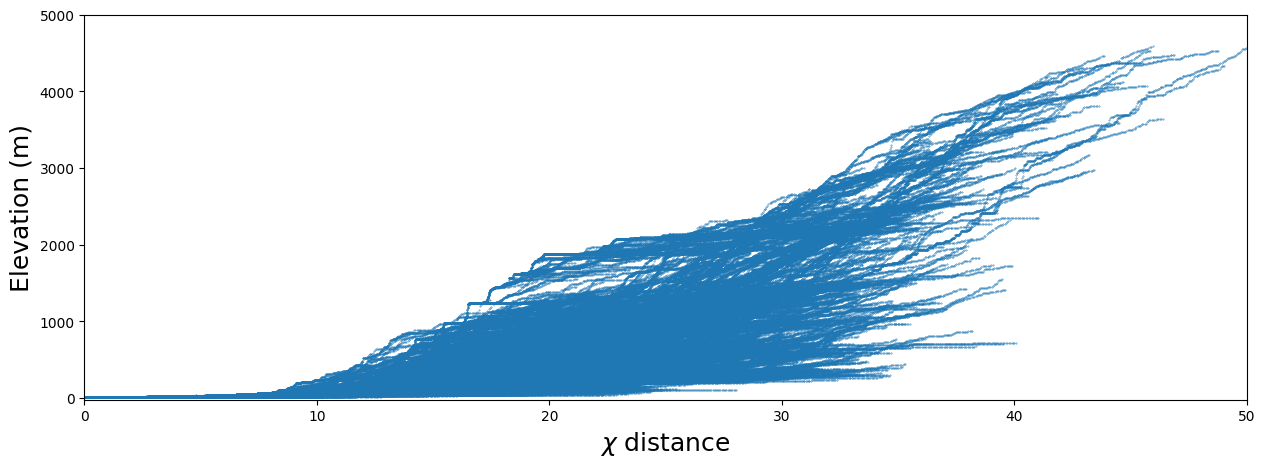

In [50]:
fig, ax = plt.subplots(figsize = (15,5))
ax.scatter(magda.chi, magda.elevation, s=0.1)

ax.set_xlabel('$\chi$ distance', fontsize=18)
ax.set_ylabel('Elevation (m)', fontsize=18)
ax.set_xlim(0,50)
ax.set_ylim(-20,5000)
#plt.savefig('/content/drive/MyDrive/INVESTIGACION/POSDOC/Figuras/chi-elevation_magda_30m.png',dpi=400,transparent=True)

### rio Atrato

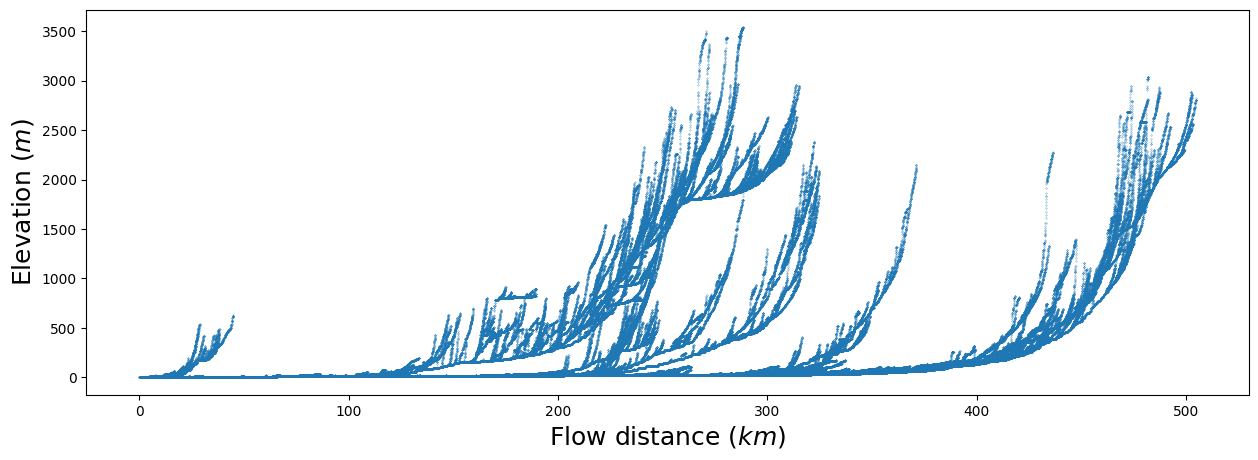

In [27]:
#To select basin (when there are several)
atrato=data[data["basin_key"].isin([620])]

fig, ax = plt.subplots(figsize = (15,5))
#to print the entire number of drainage
ax.scatter(atrato.flow_dista/1000, atrato.elevation, s=0.05)

ax.set_xlabel('Flow distance ($km$)', fontsize=18)
ax.set_ylabel('Elevation ($m$)', fontsize=18)
#ax.set_xlim(0,1100)
#ax.set_ylim(-20,5000)
#plt.savefig('/content/drive/MyDrive/INVESTIGACION/POSDOC/Figuras/LongProfi_atrato_30m.png',dpi=400,transparent=True)

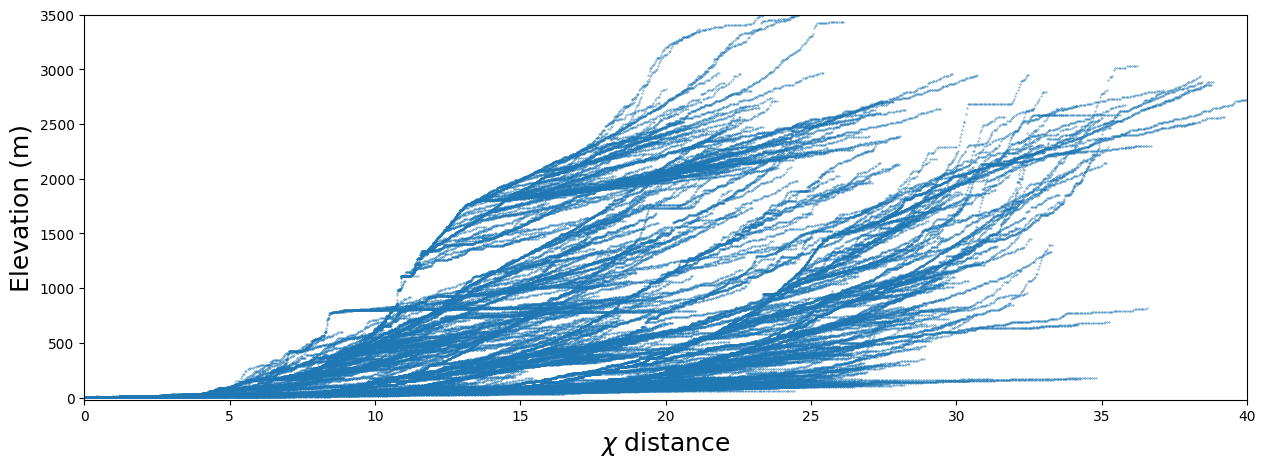

In [53]:
fig, ax = plt.subplots(figsize = (15,5))
ax.scatter(atrato.chi, atrato.elevation, s=0.1)

ax.set_xlabel('$\chi$ distance', fontsize=18)
ax.set_ylabel('Elevation (m)', fontsize=18)
ax.set_xlim(0,40)
ax.set_ylim(-20,3500)
#plt.savefig('/content/drive/MyDrive/INVESTIGACION/POSDOC/Figuras/chi-elevation_atrato_30m.png',dpi=400,transparent=True)